In [1]:
import csv 
import pandas as pd 
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

C:\Users\Dell-pc\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\Dell-pc\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Dell-pc\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
google = []
with open('google.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        google.append(rows)

google = google[1:]
google = pd.DataFrame(google,columns=['id','google score'])

google_ml = google[['google score']]

google_ml.head(5)

,google score
0,0.0
1,0.0
2,-0.20000000298023224
3,0.0
4,-0.10000000149011612


In [3]:
aws = []
with open('aws.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        aws.append(rows)

aws = aws[1:]
aws = pd.DataFrame(aws,columns=['id','aws_score',])

aws_ml = aws[['aws_score']]

aws_ml.head(5)

,aws_score
0,0.99701642
1,3.08006347
2,0.85663878
3,0.87680643
4,0.96366983


In [4]:
watson = []
with open('watson.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        watson.append(rows)

watson = watson[1:]
watson = pd.DataFrame(watson,columns=['id','watson_score'])

watson_ml = watson[['watson_score']]

watson_ml.head(5)

,watson_score
0,0.0
1,0.77
2,0.71
3,0.0
4,0.76


In [5]:
azure = []
with open('azure.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        azure.append(rows)

azure = azure[1:]
azure = pd.DataFrame(azure,columns=['id','azure score'])

azure_ml = azure[['azure score']]

azure_ml.head(5)

,azure score
0,0.5
1,0.5
2,0.5
3,0.5
4,0.890


In [6]:
manual = []
with open('manual.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        manual.append(rows)

manual = manual[1:]
manual = pd.DataFrame(manual,columns=['id','manual_sentiment'])

manual_ml = manual[['manual_sentiment']]
#manual_ml = manual_ml.replace('0','0.5')
#manual_ml = manual_ml.replace('-1','0')
manual_ml.head(5)

,manual_sentiment
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


### TPOT 

In [7]:
#!pip install tpot

In [8]:
d = google_ml.join(aws_ml)
d = d.join(azure_ml)
d = d.join(watson_ml)
#lbl = LabelEncoder()
#y = lbl.fit_transform(y)

In [9]:
lbl = LabelEncoder()
q = lbl.fit_transform(manual_ml)
d = pd.get_dummies(d).values

C:\Users\Dell-pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(d,q,test_size=0.2)
#X_train =lbl.fit_transform(X_train)
#X_test =lbl.fit_transform(X_test)
#X_test = pd.get_dummies(X_test).values
#X_train = pd.get_dummies(X_train).values

In [11]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="accuracy"
                      )

tpot.fit(X_train,y_train)
#print(tpot.score(X_test,y_test))

C:\Users\Dell-pc\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Dell-pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


29 operators have been imported by TPOT.


A Jupyter Widget

Skipped pipeline #87 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances.
_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_m

Skipped pipeline #385 due to time out. Continuing to the next pipeline.
Generation 3 - Current Pareto front scores:
-1	0.5736443726005254	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=True)
-2	0.5875861790260658	ExtraTreesClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=11, ExtraTreesClassifier__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 62
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hing

-2	0.5875861790260658	ExtraTreesClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=11, ExtraTreesClassifier__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affini

_pre_test decorator: _random_mutation_operator: num_test=0 cosine was provided as affinity. Ward can only work with euclidean distances.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous eval

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=100,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring='accuracy', subsample=1.0,
        use_dask=False, verbosity=3, warm_start=False)

In [12]:
tpot.score(X_test,y_test)

0.576

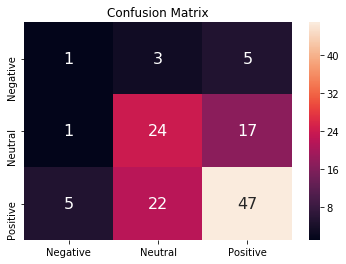

In [13]:
predict = tpot.predict(X_test)
cm = confusion_matrix(y_test,predict)
ax = plt.subplot()
ax.set_xlabel('Predicted Sentiments')
ax.set_ylabel('Manual Sentiments')
ax.set_title('Confusion Matrix')
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size
ax.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

### TEST PREDICTION ANALYSIS :
#### 1 out of 9 Negative labels were predicted correctly ; 24 out of 42 Neutral labels are predicted correctly ; 47 out of 74 Positive labels are predicted correctly. 

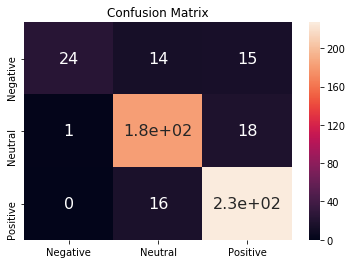

In [14]:
predict_train = tpot.predict(X_train)
cm_train = confusion_matrix(y_train,predict_train)
ax = plt.subplot()
ax.set_xlabel('Predicted Sentiments')
ax.set_ylabel('Manual Sentiments')
ax.set_title('Confusion Matrix')
sn.heatmap(cm_train, annot=True,annot_kws={"size": 16})# font size
ax.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

### TRAIN PREDICTION ANALYSIS :
#### 24 out of 53 Negative labels were predicted correctly ; 180 out of 199 Neutral labels are predicted correctly ; 230 out of 246 Positive labels are predicted correctly.

### TPOT PREDICTION ANALYSIS :
#### Negative  - 25 out of 62 ; Neutral - 204 out of 241 ; Positive - 277 out of 320 correctly predicted labels 

### H2O.AI

In [27]:
#!pip install h2o

In [15]:
import h2o

In [16]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\Dell-pc\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Dell-pc\AppData\Local\Temp\tmpkrqyp2zz
  JVM stdout: C:\Users\Dell-pc\AppData\Local\Temp\tmpkrqyp2zz\h2o_Dell_pc_started_from_python.out
  JVM stderr: C:\Users\Dell-pc\AppData\Local\Temp\tmpkrqyp2zz\h2o_Dell_pc_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,22 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_Dell_pc_w2y0vi
H2O cluster total nodes:,1
H2O cluster free memory:,1.754 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [17]:
d = google_ml.join(aws_ml)
d = d.join(azure_ml)
d = d.join(watson_ml)
d = d.join(manual_ml)

In [26]:
d.head(5)

google score,aws_score,azure score,watson_score,manual_sentiment
0,0.997016,0.5,0,0
0,3.08006,0.5,0.77,1
-0.2,0.856639,0.5,0.71,0
0,0.876806,0.5,0,0
-0.1,0.96367,0.89,0.76,1


In [18]:
d = h2o.H2OFrame(d)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [203]:
d.types

{'aws': 'real',
 'azure': 'enum',
 'google': 'real',
 'manual': 'int',
 'watson': 'real'}

In [22]:
d.describe()

Rows:622
Cols:5




,google score,aws_score,azure score,watson_score,manual_sentiment
type,real,real,enum,real,int
mins,-0.699999988079071,0.30270794,,-0.9,-1.0
mean,0.18745981045426663,1.1206514886012866,,0.5919614147909964,0.4099678456591642
maxs,0.8999999761581421,9.52166737,,0.99,1.0
sigma,0.234957039735804,1.4495970980099173,,0.40705534422138095,0.6648019808052846
zeros,154,0,,21,243
missing,0,0,0,0,0
0,0.0,0.99701642,0.5,0.0,0.0
1,0.0,3.08006347,0.5,0.77,1.0
2,-0.20000000298023224,0.85663878,0.5,0.71,0.0


In [28]:
d['manual_sentiment'] = d['manual_sentiment'].asfactor()
y = 'manual_sentiment'
x = list(d.columns)
x.remove(y)
train, test = d.split_frame([0.8])

In [29]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
dle= H2ODeepLearningEstimator()
#gbm = H2OGradientBoostingEstimator()
dle.train(x = x, y =y, training_frame = train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [30]:
dle.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.3719838605319095
RMSE: 0.6099047962853789
LogLoss: 1.2070241347611832
Mean Per-Class Error: 0.5930587337909992
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



-1,0,1,Error,Rate
0.0,9.0,1.0,1.0,10 / 10
1.0,38.0,7.0,0.1739130,8 / 46
0.0,46.0,30.0,0.6052632,46 / 76
1.0,93.0,38.0,0.4848485,64 / 132


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5151515
2,0.8712121
3,1.0


In [22]:
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
#gbm = H2OGradientBoostingEstimator()
#gbm.train(x,y,train)

In [31]:
dle.model_performance(train)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.3234095668270682
RMSE: 0.5686910996552242
LogLoss: 1.0033667437388942
Mean Per-Class Error: 0.5555248614308791
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



-1,0,1,Error,Rate
2.0,47.0,3.0,0.9615385,50 / 52
0.0,175.0,22.0,0.1116751,22 / 197
1.0,142.0,98.0,0.5933610,143 / 241
3.0,364.0,123.0,0.4387755,215 / 490


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5612245
2,0.9122449
3,0.9999999


In [32]:
dle.confusion_matrix(train)

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



-1,0,1,Error,Rate
2.0,47.0,3.0,0.9615385,50 / 52
0.0,175.0,22.0,0.1116751,22 / 197
1.0,142.0,98.0,0.5933610,143 / 241
3.0,364.0,123.0,0.4387755,215 / 490


### TRAIN PREDICTION ANALYSIS :
#### Negative - 2 out of 52 correctly predicted labels ; Neutral - 175 out of 197 labels were predicted correctly ; Positive - 98 out of 241 labels were predicted correctly

In [33]:
dle.confusion_matrix(test)

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



-1,0,1,Error,Rate
0.0,9.0,1.0,1.0,10 / 10
1.0,38.0,7.0,0.1739130,8 / 46
0.0,46.0,30.0,0.6052632,46 / 76
1.0,93.0,38.0,0.4848485,64 / 132


### TEST PREDICTION ANALYSIS 
#### Negative - 0 out of 10 correctly predicted labels ; Neutral - 38 out of 46 labels were predicted correctly ; Positive - 30 out of 76 labels were predicted correctly

### H20.ai OVERALL ANALYSIS :

#### Negative - 2 out of 62 ; Neutral - 213 out of 241 ; Positive - 128 out of 317 were predicted correctly